<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(1_6)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_1.6_n20.csv',
 'data_add_delta_1.6_n30.csv',
 'data_add_delta_1.6_n60.csv',
 'data_add_delta_1.6_n120.csv',
 'data_add_delta_1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,39.042500,85.325145,28.032727,-10.126513,152.273858,164.371991,-12.098133
1,0.0,1.0,76.918489,95.591587,98.573457,-39.463957,241.619576,287.922360,-46.302784
2,0.0,2.0,39.675414,70.548068,31.163764,31.096565,182.483811,152.523098,29.960713
3,0.0,3.0,87.795897,51.999547,85.397470,-32.663021,202.529893,237.675298,-35.145405
4,0.0,4.0,58.707751,28.815874,64.585793,2.458836,164.568254,162.216423,2.351831
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,23.088637,60.100733,92.829694,-32.976916,153.042148,184.913717,-31.871569
119996,999.0,116.0,26.383132,36.520419,94.916562,13.314097,181.134210,171.592649,9.541561
119997,999.0,117.0,25.741846,61.162248,66.979299,4.928085,168.811478,161.794601,7.016877
119998,999.0,118.0,97.413372,45.666168,52.523111,5.153879,210.756530,205.589046,5.167484


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,39.042500,85.325145,28.032727,-10.126513,152.273858,164.371991,-12.098133
1,0.0,1.0,76.918489,95.591587,98.573457,-39.463957,241.619576,287.922360,-46.302784
2,0.0,2.0,39.675414,70.548068,31.163764,31.096565,182.483811,152.523098,29.960713
3,0.0,3.0,87.795897,51.999547,85.397470,-32.663021,202.529893,237.675298,-35.145405
4,0.0,4.0,58.707751,28.815874,64.585793,2.458836,164.568254,162.216423,2.351831
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,23.088637,60.100733,92.829694,-32.976916,153.042148,184.913717,-31.871569
119996,999.0,116.0,26.383132,36.520419,94.916562,13.314097,181.134210,171.592649,9.541561
119997,999.0,117.0,25.741846,61.162248,66.979299,4.928085,168.811478,161.794601,7.016877
119998,999.0,118.0,97.413372,45.666168,52.523111,5.153879,210.756530,205.589046,5.167484


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    39.042500  85.325145  28.032727 -10.126513  152.273858   
      1.0    76.918489  95.591587  98.573457 -39.463957  241.619576   
      2.0    39.675414  70.548068  31.163764  31.096565  182.483811   
      3.0    87.795897  51.999547  85.397470 -32.663021  202.529893   
      4.0    58.707751  28.815874  64.585793   2.458836  164.568254   
...                ...        ...        ...        ...         ...   
999.0 115.0  23.088637  60.100733  92.829694 -32.976916  153.042148   
      116.0  26.383132  36.520419  94.916562  13.314097  181.134210   
      117.0  25.741846  61.162248  66.979299   4.928085  168.811478   
      118.0  97.413372  45.666168  52.523111   5.153879  210.756530   
      119.0  84.227449  48.490142  52.190647  -4.976044  189.932194   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    164.371991 -12.098133  
      1.0    287.922360 -46.302784  
      2.0    152.523098  29.960713  
      3.0    237.675298 -35.145405  
      4.0    162.216423   2.351831  
...                 ...        ...  
999.0 115.0  184.913717 -31.871569  
      116.0  171.592649   9.541561  
      117.0  161.794601   7.016877  
      118.0  205.589046   5.167484  
      119.0  194.432827  -4.500633  

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    39.042500  85.325145  28.032727 -10.126513  152.273858   
      1.0    76.918489  95.591587  98.573457 -39.463957  241.619576   
      2.0    39.675414  70.548068  31.163764  31.096565  182.483811   
      3.0    87.795897  51.999547  85.397470 -32.663021  202.529893   
      4.0    58.707751  28.815874  64.585793   2.458836  164.568254   
...                ...        ...        ...        ...         ...   
999.0 115.0  23.088637  60.100733  92.829694 -32.976916  153.042148   
      116.0  26.383132  36.520419  94.916562  13.314097  181.134210   
      117.0  25.741846  61.162248  66.979299   4.928085  168.811478   
      118.0  97.413372  45.666168  52.523111   5.153879  210.756530   
      119.0  84.227449  48.490142  52.190647  -4.976044  189.932194   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    164.371991 -12.098133  
      1.0    287.922360 -46.302784  
      2.0    152.523098  29.960713  
      3.0    237.675298 -35.145405  
      4.0    162.216423   2.351831  
...                 ...        ...  
999.0 115.0  184.913717 -31.871569  
      116.0  171.592649   9.541561  
      117.0  161.794601   7.016877  
      118.0  205.589046   5.167484  
      119.0  194.432827  -4.500633  

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,39.042500,85.325145,28.032727,-10.126513,152.273858,164.371991,-12.098133
1,0.0,1.0,76.918489,95.591587,98.573457,-39.463957,241.619576,287.922360,-46.302784
2,0.0,2.0,39.675414,70.548068,31.163764,31.096565,182.483811,152.523098,29.960713
3,0.0,3.0,87.795897,51.999547,85.397470,-32.663021,202.529893,237.675298,-35.145405
4,0.0,4.0,58.707751,28.815874,64.585793,2.458836,164.568254,162.216423,2.351831
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,23.088637,60.100733,92.829694,-32.976916,153.042148,184.913717,-31.871569
119996,999.0,116.0,26.383132,36.520419,94.916562,13.314097,181.134210,171.592649,9.541561
119997,999.0,117.0,25.741846,61.162248,66.979299,4.928085,168.811478,161.794601,7.016877
119998,999.0,118.0,97.413372,45.666168,52.523111,5.153879,210.756530,205.589046,5.167484


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    39.042500  85.325145  28.032727 -10.126513  152.273858   
      1.0    76.918489  95.591587  98.573457 -39.463957  241.619576   
      2.0    39.675414  70.548068  31.163764  31.096565  182.483811   
      3.0    87.795897  51.999547  85.397470 -32.663021  202.529893   
      4.0    58.707751  28.815874  64.585793   2.458836  164.568254   
...                ...        ...        ...        ...         ...   
999.0 115.0  23.088637  60.100733  92.829694 -32.976916  153.042148   
      116.0  26.383132  36.520419  94.916562  13.314097  181.134210   
      117.0  25.741846  61.162248  66.979299   4.928085  168.811478   
      118.0  97.413372  45.666168  52.523111   5.153879  210.756530   
      119.0  84.227449  48.490142  52.190647  -4.976044  189.932194   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    164.371991 -12.098133  
      1.0    287.922360 -46.302784  
      2.0    152.523098  29.960713  
      3.0    237.675298 -35.145405  
      4.0    162.216423   2.351831  
...                 ...        ...  
999.0 115.0  184.913717 -31.871569  
      116.0  171.592649   9.541561  
      117.0  161.794601   7.016877  
      118.0  205.589046   5.167484  
      119.0  194.432827  -4.500633  

[120000 rows x 7 columns]

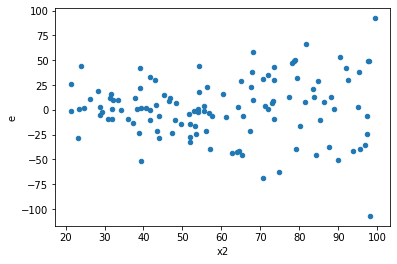

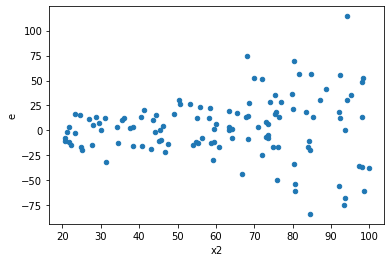

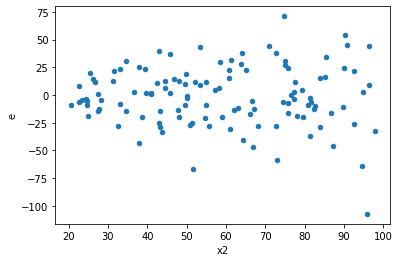

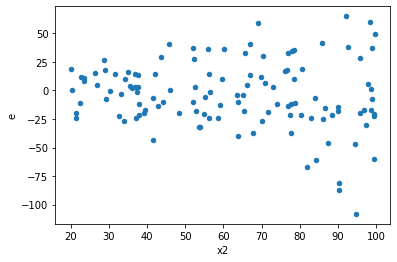

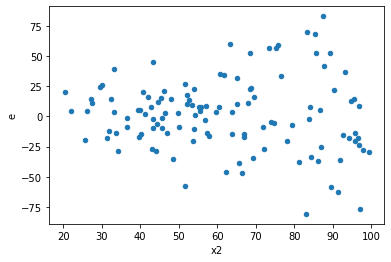

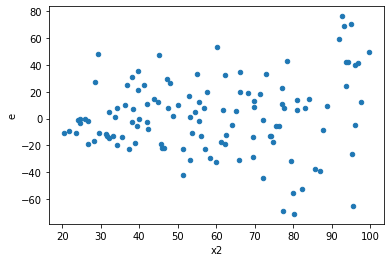

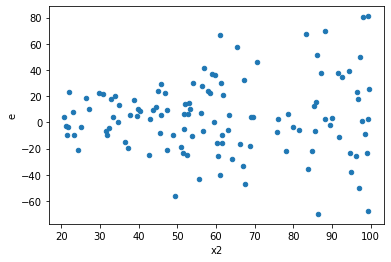

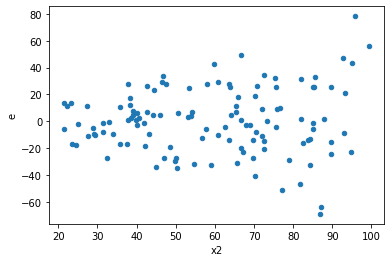

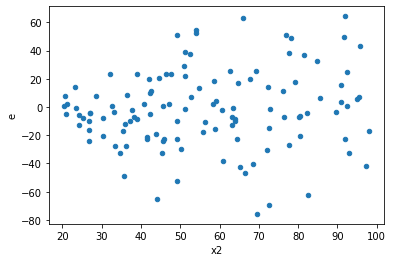

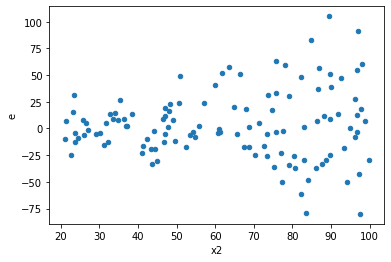

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,45.0,45.0,29804.74273517852,35828.52250917841,662.3276163373005,796.1893890928535,1.2021080949271212,0.5395049508751457,0.7302475245624271,0.26975247543757286,Reject005=1 : Homoscedasticity
1.0,45.0,45.0,20263.206326781707,65594.98970717445,450.29347392848234,1457.66643793721,3.237147598920617,0.00013665686209640704,0.9999316715689518,6.832843104820352e-05,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,24161.445928560563,37450.07288948799,536.9210206346792,832.2238419886219,1.5499930343663462,0.14538173788635111,0.9273091310568244,0.07269086894317556,Reject005=1 : Homoscedasticity
3.0,45.0,45.0,20139.133786959555,57501.39126174297,447.536306376879,1277.8086947053994,2.8552067765186675,0.000616527345662643,0.9996917363271687,0.0003082636728313215,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,32346.848983164542,52444.6330877019,718.8188662925454,1165.43629083782,1.6213212333293294,0.10867770200844817,0.9456611489957759,0.05433885100422409,Reject005=1 : Homoscedasticity
5.0,45.0,45.0,23024.45733701523,47483.23598277838,511.6546074892273,1055.1830218395196,2.0622955532785583,0.016900885291851298,0.9915495573540744,0.008450442645925649,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,27115.026499812477,47935.25141417583,602.5561444402773,1065.2278092039073,1.7678482229957377,0.05903880487965418,0.9704805975601729,0.02951940243982709,Reject005=1 : Homoscedasticity
7.0,45.0,45.0,21790.907106190774,26747.29223495353,484.24238013757275,594.3842718878562,1.2274519874096776,0.4946132274545447,0.7526933862727276,0.24730661372727236,Reject005=1 : Homoscedasticity
8.0,45.0,45.0,26863.282412452776,46461.04920844046,596.9618313878394,1032.4677601875658,1.7295373102619405,0.06933911525252934,0.9653304423737353,0.03466955762626467,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,29804.74273517852,35828.52250917841,662.3276163373005,796.1893890928535,1.2021080949271212,0.5395049508751457,Reject005=1 : Homoscedasticity
1.0,45.0,45.0,20263.206326781707,65594.98970717445,450.29347392848234,1457.66643793721,3.237147598920617,0.00013665686209640704,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,24161.445928560563,37450.07288948799,536.9210206346792,832.2238419886219,1.5499930343663462,0.14538173788635111,Reject005=1 : Homoscedasticity
3.0,45.0,45.0,20139.133786959555,57501.39126174297,447.536306376879,1277.8086947053994,2.8552067765186675,0.000616527345662643,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,32346.848983164542,52444.6330877019,718.8188662925454,1165.43629083782,1.6213212333293294,0.10867770200844817,Reject005=1 : Homoscedasticity
5.0,45.0,45.0,23024.45733701523,47483.23598277838,511.6546074892273,1055.1830218395196,2.0622955532785583,0.016900885291851298,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,27115.026499812477,47935.25141417583,602.5561444402773,1065.2278092039073,1.7678482229957377,0.05903880487965418,Reject005=1 : Homoscedasticity
7.0,45.0,45.0,21790.907106190774,26747.29223495353,484.24238013757275,594.3842718878562,1.2274519874096776,0.4946132274545447,Reject005=1 : Homoscedasticity
8.0,45.0,45.0,26863.282412452776,46461.04920844046,596.9618313878394,1032.4677601875658,1.7295373102619405,0.06933911525252934,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    564
Reject005=1 : Homoscedasticity      436
Name: Result_test, dtype: int64